In [1]:
%matplotlib inline
import numpy as np
import lsst.sims.featureScheduler as fs
#from lsst.sims.speedObservatory import Speed_observatory
import healpy as hp
import matplotlib.pylab as plt

/Users/yoachim/gitRepos/sims_featureScheduler/python/lsst/sims/featureScheduler/utils.py:28: UserWarning: Could not import ts.scheduler. This is required to load the FieldsDatabase. In this case
it will fallback to loading fields from the local "fieldID.lis" file.
  it will fallback to loading fields from the local "fieldID.lis" file.''')


In [5]:
nside = fs.set_default_nside(nside=256)
survey_length = 5.  # days
# Define what we want the final visit ratio map to look like
target_map = fs.standard_goals(nside=nside)['r']

bfs = []
bfs.append(fs.Target_map_basis_function(target_map=target_map, nside=nside))
weights = np.array([1.])
survey = fs.Simple_greedy_survey_fields(bfs, weights, nside=nside)
scheduler = fs.Core_scheduler([survey], nside=nside)

observations = []
#observatory = Speed_observatory()
#mjd = observatory.mjd
#end_mjd = mjd + survey_length
# Initiallize scheduler with conditions
#scheduler.update_conditions(observatory.return_status())

In [6]:
fields = fs.read_fields()

In [7]:
for field in fields:
    obs = fs.empty_observation()
    obs['RA'] = field['RA']
    obs['dec'] = field['dec']
    obs['filter'] = 'r'
    scheduler.add_observation(obs)

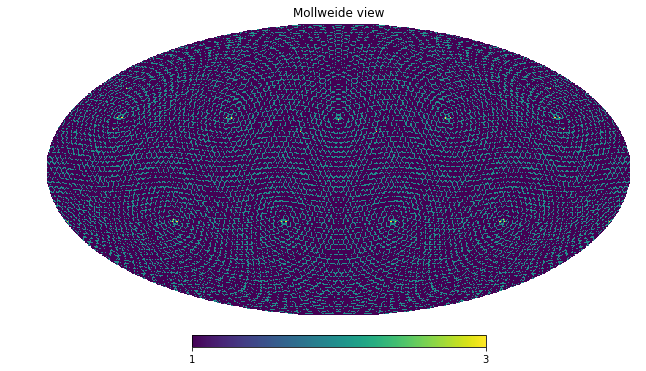

In [8]:
hp.mollview(scheduler.surveys[0].basis_functions[0].survey_features['N_obs'].feature)

In [6]:
ack = scheduler.surveys[0].basis_functions[0].survey_features['N_obs'].feature

In [10]:
np.where(ack > 1)[0].size / ack.size

0.23303985595703125